<h4>Problem Statement</h4>

Assume that you are working as analyst for “Pizzario”, a pizza delivery chain. The group has collected some interesting characteristics of customers who had purchased their pizza earlier (pizza_customers.csv file). The marketing team is planning a campaign to increase the sales of a newly launched pizza. Before that they want to analyze the segmentation of existing customers so that they can have the clearer picture about the customer categories.

Write a Python program that will take the pizza customers dataset as input and produce the clusters which represents the customer segments present in the dataset. <br>
•	You may like to do some preprocessing on the given dataset. <br>
•	You have to write your own code matching to the problem statement. <br>
•	Add comments at appropriate place so that it’s easy to understand your thought process. <br>
•	You are supposed to use k-means clustering algorithm (custom implementation not from any library) for customer segmentations. <br>
•	The program should clearly output the cluster number, centroid used and number of records belonging to that cluster. <br>
•	The final clusters should be preserved in such a way that it can be used in following exercises. <br>

Your marketing team is now aware about the spending behavior of your customers. Wear hat of marketing professional and think of marketing strategy to attract these customers to your newly launched pizza. 

<h4>Import of Packages</h4>

In [158]:
import pandas as pd

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings(action = 'ignore')

<h4>Data Load from provided csv file</h4>

In [159]:
df_pizza_customers = pd.read_csv("pizza_customers.csv")
df_pizza_customers.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


<h4>Data Analysis</h4>

In [160]:
df_pizza_customers.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [161]:
df_pizza_customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


<h4>Data Pre-Processing</h4>

In [162]:
no_customerid = df_pizza_customers['CustomerID'].nunique()
print(f'Number of unique CustomerID = {no_customerid}')

Number of unique CustomerID = 200


In [163]:
rows_df = df_pizza_customers.shape[0]
print(f'Number of rows of dataset = {rows_df}')

Number of rows of dataset = 200


In [164]:
if no_customerid == rows_df:
    print('Column for CustomerID can be ignored as it is unique for each row')

Column for CustomerID can be ignored as it is unique for each row


In [165]:
df_pc = df_pizza_customers.copy(deep=True)
df_pc.drop('CustomerID', axis=1, inplace=True)
df_pc.tail(5)

,Gender,Age,Annual Income (k$),Spending Score (1-100)
195,Female,35,120,79
196,Female,45,126,28
197,Male,32,126,74
198,Male,32,137,18
199,Male,30,137,83


<h4>One-Hot Encoding of Categorical Variable "Gender"</h4>

In [166]:
df_pc_encoded = pd.get_dummies(data=df_pc, columns=['Gender'])
df_pc_encoded.head(5)

,Age,Annual Income (k$),Spending Score (1-100),Gender_Female,Gender_Male
0,19,15,39,0,1
1,21,15,81,0,1
2,20,16,6,1,0
3,23,16,77,1,0
4,31,17,40,1,0


<h4>Scaling of Numerical Attributes using StandardScaler</h4>

In [167]:
# Standardize the features
scaler = StandardScaler()
df_pc_scaled1 = scaler.fit_transform(df_pc_encoded)
df_pc_scaled = pd.DataFrame(df_pc_scaled1, columns=df_pc_encoded.columns)
df_pc_scaled.tail(5)

,Age,Annual Income (k$),Spending Score (1-100),Gender_Female,Gender_Male
195,-0.276302,2.268791,1.118061,0.886405,-0.886405
196,0.441365,2.497807,-0.861839,0.886405,-0.886405
197,-0.491602,2.497807,0.923953,-1.128152,1.128152
198,-0.491602,2.917671,-1.250054,-1.128152,1.128152
199,-0.635135,2.917671,1.273347,-1.128152,1.128152


<h4>Determination of Optimum Value of Clusters(k) via Elbow Method</h4>

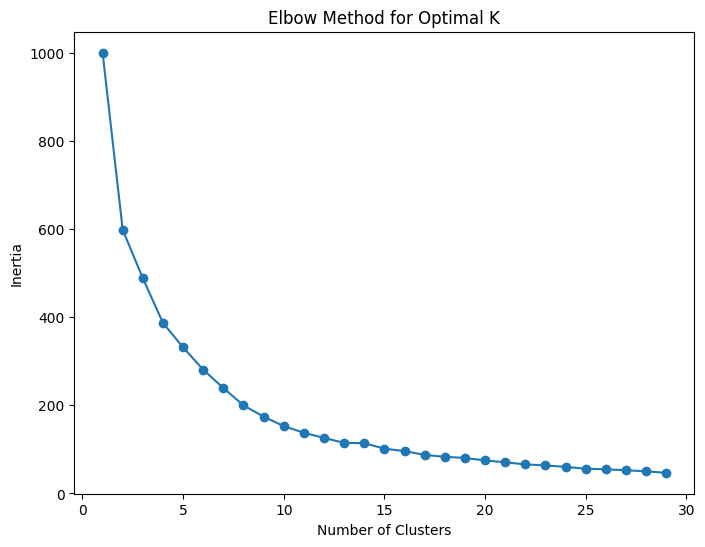

In [168]:
# Calculate inertia for a range of K values
inertia = []
for k in range(1, 30):
    kmc_model = KMeans(n_clusters=k, init='k-means++',random_state=42)
    kmc_model.fit(df_pc_scaled)
    inertia.append(kmc_model.inertia_)


# Plot the elbow curve
plt.figure(figsize=(8, 6))
plt.plot(range(1, 30), inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.show()

In above graph, inertia values for different numbers of clusters are plotted. The "elbow" point indicates the optimal number of clusters.<br>
**So, Optimal Value of numbers of clusters is set as 15.**

In [169]:
optimal_cluster = 15
model_kmc = KMeans(optimal_cluster, init='k-means++',random_state=42)
model_kmc.fit(df_pc_scaled)

KMeans(n_clusters=15, random_state=42)

In [170]:
df_pc_scaled['Cluster']=model_kmc.labels_
df_pc_scaled.head(5)

,Age,Annual Income (k$),Spending Score (1-100),Gender_Female,Gender_Male,Cluster
0,-1.424569,-1.738999,-0.434801,-1.128152,1.128152,3
1,-1.281035,-1.738999,1.195704,-1.128152,1.128152,3
2,-1.352802,-1.700830,-1.715913,0.886405,-0.886405,0
3,-1.137502,-1.700830,1.040418,0.886405,-0.886405,4
4,-0.563369,-1.662660,-0.395980,0.886405,-0.886405,0


<h4>Centroid of Clusters</h4>

In [171]:
# Print the cluster centers
print("Cluster Centers:")
# print(model_kmc.cluster_centers_)
print(scaler.inverse_transform(model_kmc.cluster_centers_))

Cluster Centers:
[[ 4.15384615e+01  2.65384615e+01  2.06923077e+01  1.00000000e+00
  -1.66533454e-16]
 [ 4.61250000e+01  6.10625000e+01  4.66250000e+01  1.00000000e+00
  -1.66533454e-16]
 [ 4.86363636e+01  8.22727273e+01  1.91818182e+01  0.00000000e+00
   1.00000000e+00]
 [ 2.44000000e+01  2.47000000e+01  7.38000000e+01  0.00000000e+00
   1.00000000e+00]
 [ 2.54615385e+01  2.56923077e+01  8.05384615e+01  1.00000000e+00
  -1.66533454e-16]
 [ 3.57000000e+01  7.50000000e+01  8.69000000e+01  0.00000000e+00
   1.00000000e+00]
 [ 3.21904762e+01  8.60476190e+01  8.16666667e+01  1.00000000e+00
  -5.55111512e-17]
 [ 5.93157895e+01  5.43157895e+01  4.92105263e+01  0.00000000e+00
   1.00000000e+00]
 [ 4.37857143e+01  9.32857143e+01  2.06428571e+01  1.00000000e+00
  -1.11022302e-16]
 [ 5.90000000e+01  4.95000000e+01  5.05000000e+01  1.00000000e+00
  -1.11022302e-16]
 [ 2.51538462e+01  5.53076923e+01  5.30000000e+01  0.00000000e+00
   1.00000000e+00]
 [ 2.83333333e+01  8.86666667e+01  7.77777778e+0

<h4>Number of Records for each Cluster</h4>

In [172]:
df_pc_scaled['Cluster'].value_counts()

14    21
6     21
7     19
1     16
9     14
8     14
0     13
4     13
10    13
2     11
3     10
5     10
11     9
13     8
12     8
Name: Cluster, dtype: int64

<h4>Update of csv file with cluster info</h4>

The final clusters should be preserved in such a way that it can be used in following exercises

In [173]:
df_pizza_customers['Cluster'] = df_pc_scaled['Cluster']
df_pizza_customers

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,Male,19,15,39,3
1,2,Male,21,15,81,3
2,3,Female,20,16,6,0
3,4,Female,23,16,77,4
4,5,Female,31,17,40,0
...,...,...,...,...,...,...
195,196,Female,35,120,79,6
196,197,Female,45,126,28,8
197,198,Male,32,126,74,12
198,199,Male,32,137,18,11


In [174]:
# Write-back updated DataFrame to a CSV file
df_pizza_customers.to_csv('pizza_customers_updated.csv', index=False)

<h4>Visualization of Clusters</h4>

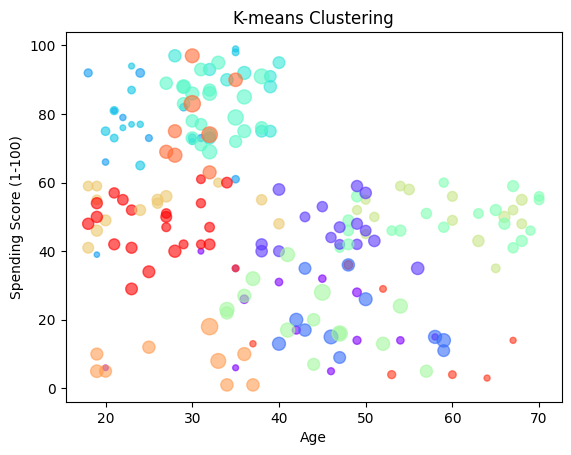

In [175]:
plt.scatter(df_pizza_customers['Age'], df_pizza_customers['Spending Score (1-100)'], 
            c=df_pizza_customers['Cluster'], cmap='rainbow',s=df_pizza_customers['Annual Income (k$)'], alpha=0.6)
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')
plt.title('K-means Clustering')
plt.show()